In [757]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = './transaction-data-adhoc-analysis.json'
df = pd.read_json(data)

# separate transaction items
df["transaction_items"] = df["transaction_items"].str.split(";")
new_df = df.explode("transaction_items")

# separate month
new_df['transaction_month'] = pd.to_datetime(new_df['transaction_date']).dt.month

# amount of transaction items
amount = new_df['transaction_items'].str[-2]
new_df['items_amount'] = amount
new_df = new_df.astype({'items_amount':'int'})

#separate transaction items from brand
items = new_df['transaction_items'].str.split(pat = ',', expand = True)
new_df.insert(loc = 1, column = 'brand_name', value = items[0])
new_df.insert(loc = 2, column = 'item_name', value = items[1])

#extract year from birthdate
new_df['birth_day'] = pd.DatetimeIndex(new_df['birthdate']).day
new_df['birth_month'] = pd.to_datetime(new_df['birthdate']).dt.month


new_df = new_df[["name","sex","birthdate","birth_day","birth_month","item_name","transaction_value","items_amount","transaction_month"]]

new_df
#here we were able to extract the month from the transaction date, each item, and the amount of items

,name,sex,birthdate,birth_day,birth_month,item_name,transaction_value,items_amount,transaction_month
0,Jennifer Campbell,F,1926/03/11,11,3,Beef Chicharon,5196,4,1
1,Melissa Kim,F,2016/07/08,8,7,Beef Chicharon,12056,3,1
1,Melissa Kim,F,2016/07/08,8,7,Nutrional Milk,12056,4,1
1,Melissa Kim,F,2016/07/08,8,7,Orange Beans,12056,1,1
2,Melissa Kim,F,2016/07/08,8,7,Gummy Vitamins,5500,3,1
...,...,...,...,...,...,...,...,...,...
83034,Donald Andersen,M,1913/11/04,4,11,Nutrional Milk,4280,2,6
83034,Donald Andersen,M,1913/11/04,4,11,Gummy Worms,4280,2,6
83035,Stephanie Russell,F,2012/04/30,30,4,Nutrional Milk,2639,1,6
83035,Stephanie Russell,F,2012/04/30,30,4,Gummy Worms,2639,3,6


In [758]:
# assign price values

def item(x):
    
    prices = {"Beef Chicharon":1299,
              "Kimchi and Seaweed":799,
              "Gummy Worms":150,
              "Orange Beans":199,
              "Nutrional Milk":1990,
              "Yummy Vegetables":500,
              "Gummy Vitamins":1500,
             }
    return(prices[x])

new_df['item_price'] = new_df['item_name'].apply(item)

new_df

,name,sex,birthdate,birth_day,birth_month,item_name,transaction_value,items_amount,transaction_month,item_price
0,Jennifer Campbell,F,1926/03/11,11,3,Beef Chicharon,5196,4,1,1299
1,Melissa Kim,F,2016/07/08,8,7,Beef Chicharon,12056,3,1,1299
1,Melissa Kim,F,2016/07/08,8,7,Nutrional Milk,12056,4,1,1990
1,Melissa Kim,F,2016/07/08,8,7,Orange Beans,12056,1,1,199
2,Melissa Kim,F,2016/07/08,8,7,Gummy Vitamins,5500,3,1,1500
...,...,...,...,...,...,...,...,...,...,...
83034,Donald Andersen,M,1913/11/04,4,11,Nutrional Milk,4280,2,6,1990
83034,Donald Andersen,M,1913/11/04,4,11,Gummy Worms,4280,2,6,150
83035,Stephanie Russell,F,2012/04/30,30,4,Nutrional Milk,2639,1,6,1990
83035,Stephanie Russell,F,2012/04/30,30,4,Gummy Worms,2639,3,6,150


In [759]:
# add total of each item transaction

new_df['total'] = new_df['items_amount'] * new_df['item_price']

new_df

,name,sex,birthdate,birth_day,birth_month,item_name,transaction_value,items_amount,transaction_month,item_price,total
0,Jennifer Campbell,F,1926/03/11,11,3,Beef Chicharon,5196,4,1,1299,5196
1,Melissa Kim,F,2016/07/08,8,7,Beef Chicharon,12056,3,1,1299,3897
1,Melissa Kim,F,2016/07/08,8,7,Nutrional Milk,12056,4,1,1990,7960
1,Melissa Kim,F,2016/07/08,8,7,Orange Beans,12056,1,1,199,199
2,Melissa Kim,F,2016/07/08,8,7,Gummy Vitamins,5500,3,1,1500,4500
...,...,...,...,...,...,...,...,...,...,...,...
83034,Donald Andersen,M,1913/11/04,4,11,Nutrional Milk,4280,2,6,1990,3980
83034,Donald Andersen,M,1913/11/04,4,11,Gummy Worms,4280,2,6,150,300
83035,Stephanie Russell,F,2012/04/30,30,4,Nutrional Milk,2639,1,6,1990,1990
83035,Stephanie Russell,F,2012/04/30,30,4,Gummy Worms,2639,3,6,150,450


In [772]:
def zodiac_sign(day, month): 

    if month == 12: 
        return "Sagittarius" if (day < 22) else 'Capricorn'

    elif month == 1: 
        return 'Capricorn' if (day < 20) else 'Aquarius'

    elif month == 2: 
        return 'Aquarius' if (day < 19) else 'Pisces'

    elif month == 3: 
        return 'Pisces' if (day < 21) else 'Aries'

    elif month == 4: 
        return 'Aries' if (day < 20) else 'Taurus'

    elif month == 5: 
        return 'Taurus' if (day < 21) else 'Gemini'

    elif month == 6: 
        return 'Gemini' if (day < 21) else 'Cancer'

    elif month == 7: 
        return 'Cancer' if (day < 23) else 'Leo'

    elif month == 8: 
        return 'Leo' if (day < 23) else 'Virgo'

    elif month == 9: 
        return 'Virgo' if (day < 23) else 'Libra'

    elif month == 10: 
        return 'Libra' if (day < 23) else 'Scorpio'

    elif month == 11: 
        return 'Scorpio' if (day < 22) else 'Sagittarius'

new_df = new_df.assign(month = new_df['birth_month'],
                             day = new_df['birth_day'])

new_df['zodiac_sign'] = new_df.apply(lambda x: zodiac_sign(x["birth_day"], x["birth_month"]), axis=1)
new_df

,name,sex,birthdate,birth_day,birth_month,item_name,transaction_value,items_amount,transaction_month,item_price,total,month,day,sign,zodiac_sign
0,Jennifer Campbell,F,1926/03/11,11,3,Beef Chicharon,5196,4,1,1299,5196,3,11,Pisces,Pisces
1,Melissa Kim,F,2016/07/08,8,7,Beef Chicharon,12056,3,1,1299,3897,7,8,Cancer,Cancer
1,Melissa Kim,F,2016/07/08,8,7,Nutrional Milk,12056,4,1,1990,7960,7,8,Cancer,Cancer
1,Melissa Kim,F,2016/07/08,8,7,Orange Beans,12056,1,1,199,199,7,8,Cancer,Cancer
2,Melissa Kim,F,2016/07/08,8,7,Gummy Vitamins,5500,3,1,1500,4500,7,8,Cancer,Cancer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83034,Donald Andersen,M,1913/11/04,4,11,Nutrional Milk,4280,2,6,1990,3980,11,4,scorpio,Scorpio
83034,Donald Andersen,M,1913/11/04,4,11,Gummy Worms,4280,2,6,150,300,11,4,scorpio,Scorpio
83035,Stephanie Russell,F,2012/04/30,30,4,Nutrional Milk,2639,1,6,1990,1990,4,30,Taurus,Taurus
83035,Stephanie Russell,F,2012/04/30,30,4,Gummy Worms,2639,3,6,150,450,4,30,Taurus,Taurus


In [784]:
zodiac_breakdown = pd.pivot_table(data=new_df,
                       index=['zodiac_sign'],
                       columns=['transaction_month'],
                       values=['items_amount'],
                       aggfunc='sum')

zodiac_breakdown.columns = ['1','2','3','4','5','6']
zodiac_breakdown = zodiac_breakdown.rename(columns = {'1': "January", 
                          '2': "February",
                          '3': "March",
                          '4': "April",
                          '5': "May",
                          '6': "June"})

zodiac_breakdown

,January,February,March,April,May,June
zodiac_sign,,,,,,
Aquarius,5971,6042,6113,5956,5967,6259
Aries,5225,5630,5725,5671,5321,5609
Cancer,6224,6203,6198,5823,6121,5862
Capricorn,5480,5733,5842,5652,5683,5850
Gemini,5551,5726,5322,5828,5897,5646
Leo,6022,6292,5865,6015,6280,6180
Libra,5572,5658,5425,5218,5281,5594
Pisces,5537,5350,5555,5610,5470,5565
Sagittarius,5458,5651,5896,5600,5608,5747


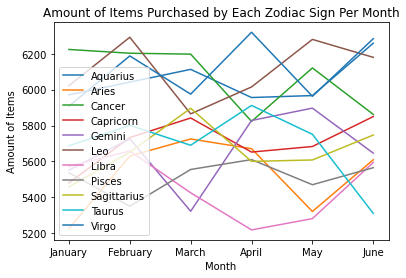

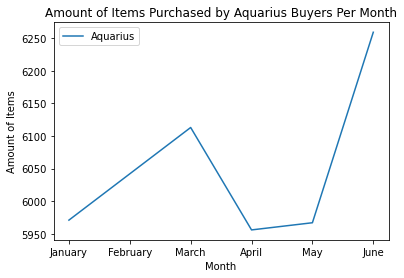

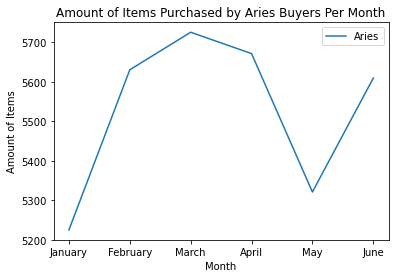

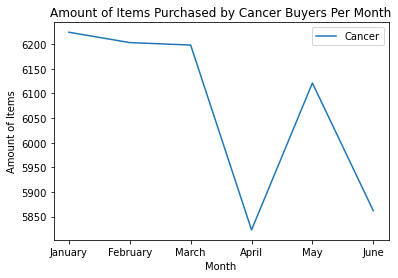

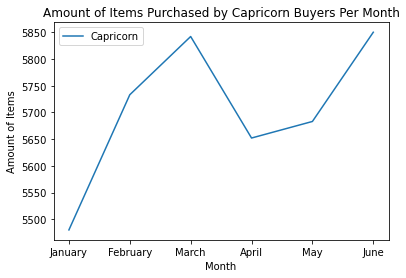

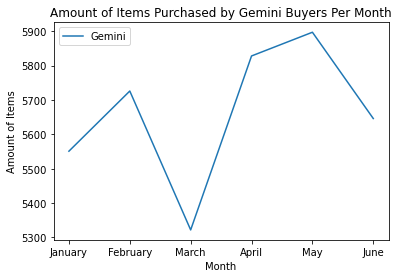

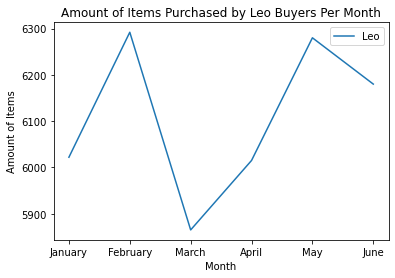

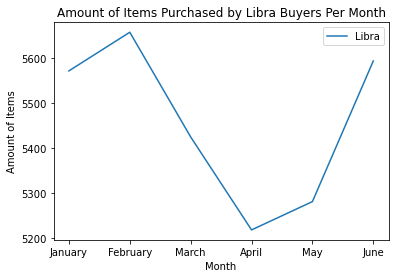

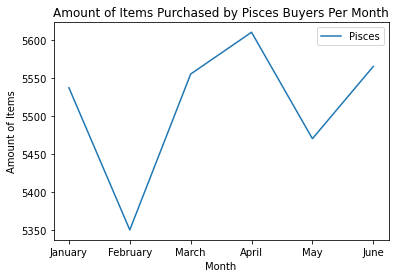

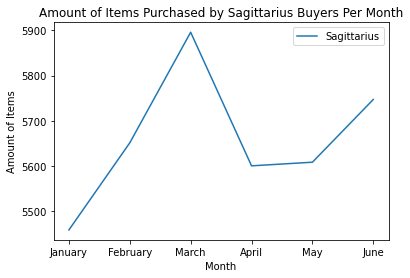

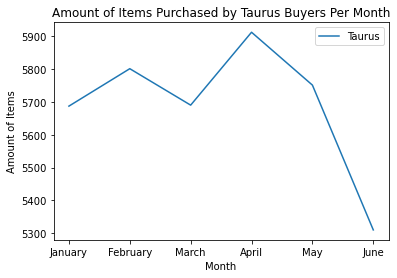

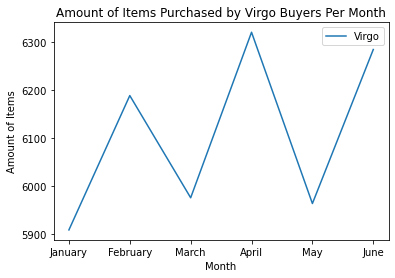

In [789]:
# total Amount of Items Purchased by Each Zodiac Sign Per Month
plt.plot(zodiac_breakdown.columns, zodiac_breakdown.loc['Aquarius'], label = 'Aquarius')
plt.plot(zodiac_breakdown.columns, zodiac_breakdown.loc['Aries'], label = "Aries")
plt.plot(zodiac_breakdown.columns, zodiac_breakdown.loc['Cancer'], label = "Cancer")
plt.plot(zodiac_breakdown.columns, zodiac_breakdown.loc['Capricorn'], label = "Capricorn")
plt.plot(zodiac_breakdown.columns, zodiac_breakdown.loc['Gemini'], label = "Gemini")
plt.plot(zodiac_breakdown.columns, zodiac_breakdown.loc['Leo'], label = "Leo")
plt.plot(zodiac_breakdown.columns, zodiac_breakdown.loc['Libra'], label = "Libra")
plt.plot(zodiac_breakdown.columns, zodiac_breakdown.loc['Pisces'], label = "Pisces")
plt.plot(zodiac_breakdown.columns, zodiac_breakdown.loc['Sagittarius'], label = "Sagittarius")
plt.plot(zodiac_breakdown.columns, zodiac_breakdown.loc['Taurus'], label = "Taurus")
plt.plot(zodiac_breakdown.columns, zodiac_breakdown.loc['Virgo'], label = "Virgo")
plt.xlabel('Month')
plt.ylabel('Amount of Items')
plt.title('Amount of Items Purchased by Each Zodiac Sign Per Month')
plt.legend()
plt.show()

# total Amount of Items Purchased by Aquarius buyers Per Month
plt.plot(zodiac_breakdown.columns, zodiac_breakdown.loc['Aquarius'], label = 'Aquarius')

plt.xlabel('Month')
plt.ylabel('Amount of Items')
plt.title('Amount of Items Purchased by Aquarius Buyers Per Month')
plt.legend()
plt.show()

# total Amount of Items Purchased by Aquarius buyers Per Month
plt.plot(zodiac_breakdown.columns, zodiac_breakdown.loc['Aries'], label = "Aries")

plt.xlabel('Month')
plt.ylabel('Amount of Items')
plt.title('Amount of Items Purchased by Aries Buyers Per Month')
plt.legend()
plt.show()

# total Amount of Items Purchased by Cancer buyers Per Month
plt.plot(zodiac_breakdown.columns, zodiac_breakdown.loc['Cancer'], label = "Cancer")
plt.xlabel('Month')
plt.ylabel('Amount of Items')
plt.title('Amount of Items Purchased by Cancer Buyers Per Month')
plt.legend()
plt.show()

# total Amount of Items Purchased by Capricorn buyers Per Month
plt.plot(zodiac_breakdown.columns, zodiac_breakdown.loc['Capricorn'], label = "Capricorn")
plt.xlabel('Month')
plt.ylabel('Amount of Items')
plt.title('Amount of Items Purchased by Capricorn Buyers Per Month')
plt.legend()
plt.show()

# total Amount of Items Purchased by Gemini buyers Per Month
plt.plot(zodiac_breakdown.columns, zodiac_breakdown.loc['Gemini'], label = "Gemini")
plt.xlabel('Month')
plt.ylabel('Amount of Items')
plt.title('Amount of Items Purchased by Gemini Buyers Per Month')
plt.legend()
plt.show()

# total Amount of Items Purchased by Leo buyers Per Month
plt.plot(zodiac_breakdown.columns, zodiac_breakdown.loc['Leo'], label = "Leo")
plt.xlabel('Month')
plt.ylabel('Amount of Items')
plt.title('Amount of Items Purchased by Leo Buyers Per Month')
plt.legend()
plt.show()

# total Amount of Items Purchased by Libra buyers Per Month
plt.plot(zodiac_breakdown.columns, zodiac_breakdown.loc['Libra'], label = "Libra")
plt.xlabel('Month')
plt.ylabel('Amount of Items')
plt.title('Amount of Items Purchased by Libra Buyers Per Month')
plt.legend()
plt.show()

# total Amount of Items Purchased by pisces buyers Per Month
plt.plot(zodiac_breakdown.columns, zodiac_breakdown.loc['Pisces'], label = "Pisces")
plt.xlabel('Month')
plt.ylabel('Amount of Items')
plt.title('Amount of Items Purchased by Pisces Buyers Per Month')
plt.legend()
plt.show()

# total Amount of Items Purchased by Sagittarius buyers Per Month
plt.plot(zodiac_breakdown.columns, zodiac_breakdown.loc['Sagittarius'], label = "Sagittarius")
plt.xlabel('Month')
plt.ylabel('Amount of Items')
plt.title('Amount of Items Purchased by Sagittarius Buyers Per Month')
plt.legend()
plt.show()

# total Amount of Items Purchased by Taurus buyers Per Month
plt.plot(zodiac_breakdown.columns, zodiac_breakdown.loc['Taurus'], label = "Taurus")
plt.xlabel('Month')
plt.ylabel('Amount of Items')
plt.title('Amount of Items Purchased by Taurus Buyers Per Month')
plt.legend()
plt.show()

# total Amount of Items Purchased by Virgo buyers Per Month
plt.plot(zodiac_breakdown.columns, zodiac_breakdown.loc['Virgo'], label = "Virgo")
plt.xlabel('Month')
plt.ylabel('Amount of Items')
plt.title('Amount of Items Purchased by Virgo Buyers Per Month')
plt.legend()
plt.show()

In [783]:
# At minimum, they want to have a breakdown of the count of each item sold per month, and they also want to have a breakdown of the total sale value per item per month.

monthly_breakdown = pd.pivot_table(data=new_df,
                       index=['item_name','transaction_month'],
                       values=['items_amount','total'],
                       aggfunc='sum')
monthly_breakdown

items_amount     total
item_name          transaction_month                        
Beef Chicharon     1                          9665  12554835
                   2                         10001  12991299
                   3                          9816  12750984
                   4                          9890  12847110
                   5                         10028  13026372
                   6                          9902  12862698
Gummy Vitamins     1                          9681  14521500
                   2                          9980  14970000
                   3                         10145  15217500
                   4                          9842  14763000
                   5                          9948  14922000
                   6                          9980  14970000
Gummy Worms        1                          9559   1433850
                   2                          9996   1499400
                   3                          9986   1497900
                   4                         10043   1506450
                   5                          9801   1470150
                   6                          9934   1490100
Kimchi and Seaweed 1                          9676   7731124
                   2                          9949   7949251
                   3                          9967   7963633
                   4                          9921   7926879
                   5                          9773   7808627
                   6                         10104   8073096
Nutrional Milk     1                          9727  19356730
                   2                          9691  19285090
                   3                          9876  19653240
                   4                          9786  19474140
                   5                          9881  19663190
                   6                          9767  19436330
Orange Beans       1                          9774   1945026
                   2                         10037   1997363
                   3                          9611   1912589
                   4                          9914   1972886
                   5                          9964   1982836
                   6                         10106   2011094
Yummy Vegetables   1                          9959   4979500
                   2                         10256   5128000
                   3                          9896   4948000
                   4                          9861   4930500
                   5                          9735   4867500
                   6                          9722   4861000

In [668]:
# breakdown of the count of each item sold per month, and they also want to have a breakdown of the total sale value per item per month.
# items amount
monthly_items_breakdown = pd.pivot_table(data=new_df,
                       index=['item_name'],
                       columns=['transaction_month'], 
                       values=['items_amount'],
                       aggfunc='sum')

monthly_items_breakdown.columns = ['1','2','3','4','5','6']

monthly_items_breakdown = monthly_items_breakdown.rename(columns = {'1': "January", 
                          '2': "February",
                          '3': "March",
                          '4': "April",
                          '5': "May",
                          '6': "June"})

monthly_items_breakdown

,January,February,March,April,May,June
item_name,,,,,,
Beef Chicharon,9665,10001,9816,9890,10028,9902
Gummy Vitamins,9681,9980,10145,9842,9948,9980
Gummy Worms,9559,9996,9986,10043,9801,9934
Kimchi and Seaweed,9676,9949,9967,9921,9773,10104
Nutrional Milk,9727,9691,9876,9786,9881,9767
Orange Beans,9774,10037,9611,9914,9964,10106
Yummy Vegetables,9959,10256,9896,9861,9735,9722


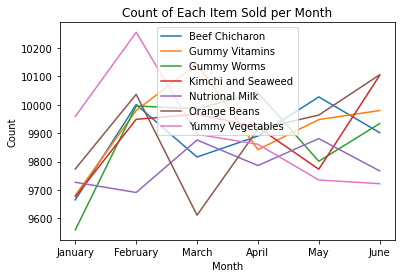

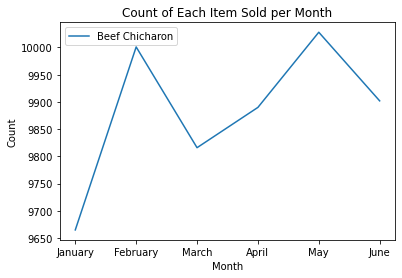

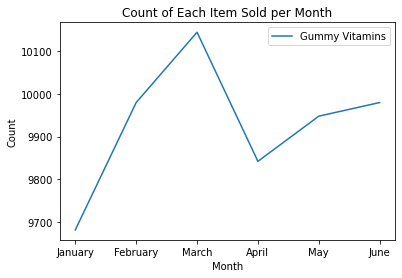

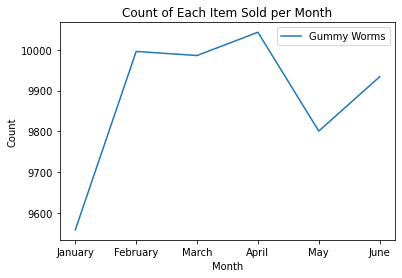

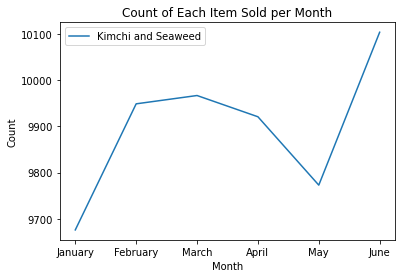

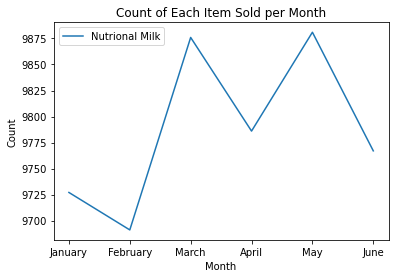

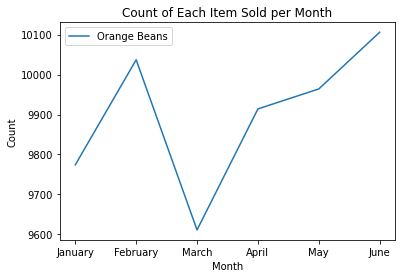

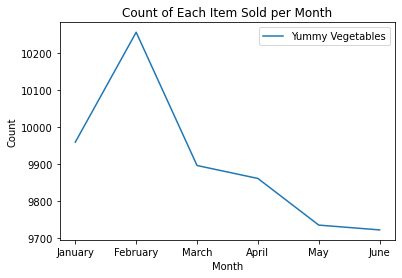

In [685]:
# total breakdown of items count
plt.plot(monthly_items_breakdown.columns, monthly_items_breakdown.loc["Beef Chicharon"], label = "Beef Chicharon")
plt.plot(monthly_items_breakdown.columns, monthly_items_breakdown.loc['Gummy Vitamins'], label = "Gummy Vitamins")
plt.plot(monthly_items_breakdown.columns, monthly_items_breakdown.loc['Gummy Worms'], label = "Gummy Worms")
plt.plot(monthly_items_breakdown.columns, monthly_items_breakdown.loc['Kimchi and Seaweed'], label = "Kimchi and Seaweed")
plt.plot(monthly_items_breakdown.columns, monthly_items_breakdown.loc['Nutrional Milk'], label = "Nutrional Milk")
plt.plot(monthly_items_breakdown.columns, monthly_items_breakdown.loc['Orange Beans'], label = "Orange Beans")
plt.plot(monthly_items_breakdown.columns, monthly_items_breakdown.loc['Yummy Vegetables'], label = "Yummy Vegetables")
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Count of Each Item Sold per Month')
plt.legend()
plt.show()

# item count of beef chich
plt.plot(monthly_items_breakdown.columns, monthly_items_breakdown.loc["Beef Chicharon"], label = "Beef Chicharon")

plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Count of Each Item Sold per Month')
plt.legend()
plt.show()

# item count of gummy vitamins
plt.plot(monthly_items_breakdown.columns, monthly_items_breakdown.loc['Gummy Vitamins'], label = "Gummy Vitamins")

plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Count of Each Item Sold per Month')
plt.legend()
plt.show()

# item count of gummy worms
plt.plot(monthly_items_breakdown.columns, monthly_items_breakdown.loc['Gummy Worms'], label = "Gummy Worms")

plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Count of Each Item Sold per Month')
plt.legend()
plt.show()

# item count of kimchi and seaweed
plt.plot(monthly_items_breakdown.columns, monthly_items_breakdown.loc['Kimchi and Seaweed'], label = "Kimchi and Seaweed")

plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Count of Each Item Sold per Month')
plt.legend()
plt.show()

# item count of nutrional milk
plt.plot(monthly_items_breakdown.columns, monthly_items_breakdown.loc['Nutrional Milk'], label = "Nutrional Milk")

plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Count of Each Item Sold per Month')
plt.legend()
plt.show()

# item count of orange beans
plt.plot(monthly_items_breakdown.columns, monthly_items_breakdown.loc['Orange Beans'], label = "Orange Beans")

plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Count of Each Item Sold per Month')
plt.legend()
plt.show()

# item count of yummy veg
plt.plot(monthly_items_breakdown.columns, monthly_items_breakdown.loc['Yummy Vegetables'], label = "Yummy Vegetables")

plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Count of Each Item Sold per Month')
plt.legend()
plt.show()

In [705]:
monthly_breakdown_total = pd.pivot_table(data=new_df,
                       index=['item_name'],
                       columns=['transaction_month'], 
                       values=['total'],
                       aggfunc='sum')

monthly_breakdown_total.columns = ['1','2','3','4','5','6']

monthly_breakdown_total = monthly_breakdown_total.rename(columns = {'1': "January", 
                          '2': "February",
                          '3': "March",
                          '4': "April",
                          '5': "May",
                          '6': "June"})
monthly_breakdown_total

,January,February,March,April,May,June
item_name,,,,,,
Beef Chicharon,12554835,12991299,12750984,12847110,13026372,12862698
Gummy Vitamins,14521500,14970000,15217500,14763000,14922000,14970000
Gummy Worms,1433850,1499400,1497900,1506450,1470150,1490100
Kimchi and Seaweed,7731124,7949251,7963633,7926879,7808627,8073096
Nutrional Milk,19356730,19285090,19653240,19474140,19663190,19436330
Orange Beans,1945026,1997363,1912589,1972886,1982836,2011094
Yummy Vegetables,4979500,5128000,4948000,4930500,4867500,4861000


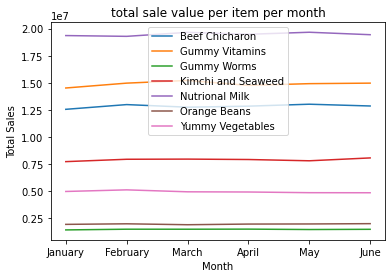

In [699]:
# combined table with all items

plt.plot(monthly_breakdown_total.columns, monthly_breakdown_total.loc["Beef Chicharon"], label = "Beef Chicharon")
plt.plot(monthly_breakdown_total.columns, monthly_breakdown_total.loc['Gummy Vitamins'], label = "Gummy Vitamins")
plt.plot(monthly_breakdown_total.columns, monthly_breakdown_total.loc['Gummy Worms'], label = "Gummy Worms")
plt.plot(monthly_breakdown_total.columns, monthly_breakdown_total.loc['Kimchi and Seaweed'], label = "Kimchi and Seaweed")
plt.plot(monthly_breakdown_total.columns, monthly_breakdown_total.loc['Nutrional Milk'], label = "Nutrional Milk")
plt.plot(monthly_breakdown_total.columns, monthly_breakdown_total.loc['Orange Beans'], label = "Orange Beans")
plt.plot(monthly_breakdown_total.columns, monthly_breakdown_total.loc['Yummy Vegetables'], label = "Yummy Vegetables")

plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.title('total sale value per item per month')
plt.legend()
plt.show()

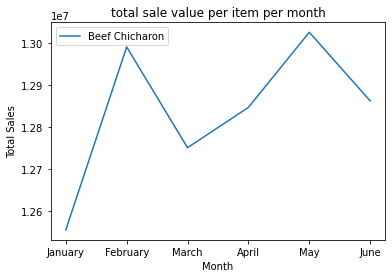

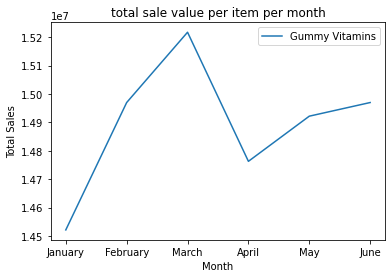

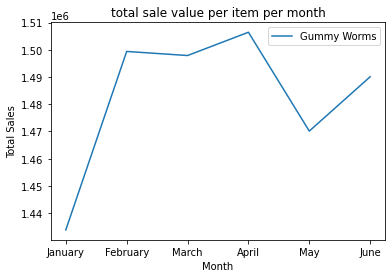

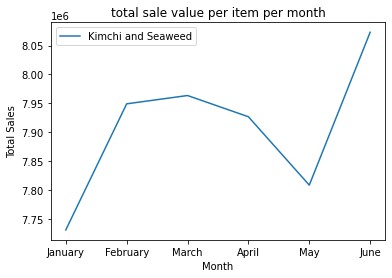

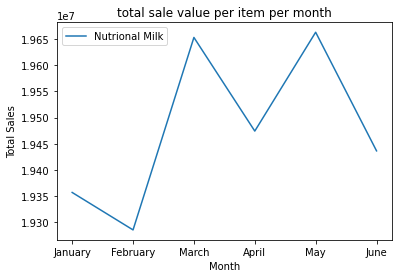

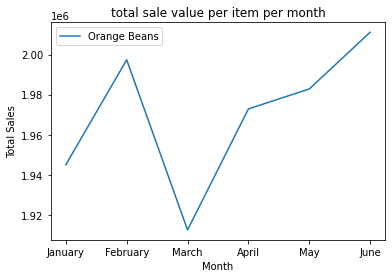

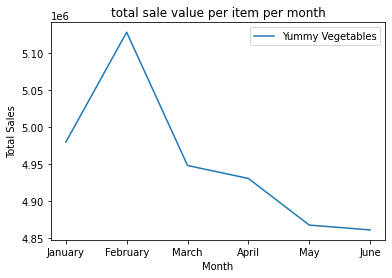

In [698]:
# total sale value of beef chich
plt.plot(monthly_breakdown_total.columns, monthly_breakdown_total.loc["Beef Chicharon"], label = "Beef Chicharon")
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.title('total sale value per item per month')
plt.legend()
plt.show()

# total sale value of gummy vit
plt.plot(monthly_breakdown_total.columns, monthly_breakdown_total.loc['Gummy Vitamins'], label = "Gummy Vitamins")
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.title('total sale value per item per month')
plt.legend()
plt.show()

# total sale value of gummy worms
plt.plot(monthly_breakdown_total.columns, monthly_breakdown_total.loc['Gummy Worms'], label = "Gummy Worms")
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.title('total sale value per item per month')
plt.legend()
plt.show()

# total sale value of kimchi 
plt.plot(monthly_breakdown_total.columns, monthly_breakdown_total.loc['Kimchi and Seaweed'], label = "Kimchi and Seaweed")
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.title('total sale value per item per month')
plt.legend()
plt.show()

# total sale value of milk
plt.plot(monthly_breakdown_total.columns, monthly_breakdown_total.loc['Nutrional Milk'], label = "Nutrional Milk")
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.title('total sale value per item per month')
plt.legend()
plt.show()

# total sale value of beans
plt.plot(monthly_breakdown_total.columns, monthly_breakdown_total.loc['Orange Beans'], label = "Orange Beans")
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.title('total sale value per item per month')
plt.legend()
plt.show()

# total sale value of vegetables
plt.plot(monthly_breakdown_total.columns, monthly_breakdown_total.loc['Yummy Vegetables'], label = "Yummy Vegetables")
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.title('total sale value per item per month')
plt.legend()
plt.show()

In [700]:
customer_data = pd.pivot_table(data=new_df,
                       index=['name'],
                       columns=['transaction_month'],
                       values=['items_amount'],
                       aggfunc='sum')

customer_data = customer_data.fillna(0)
customer_data.columns = ['1','2','3','4','5','6']
customer_data= customer_data.astype(int)

customer_data

,1,2,3,4,5,6
name,,,,,,
Aaron Beasley,0,0,0,9,8,1
Aaron Brewer,4,6,1,9,0,13
Aaron Brown,0,0,20,14,8,1
Aaron Coffey,1,7,9,12,12,0
Aaron Davis,6,1,0,15,15,12
...,...,...,...,...,...,...
Zachary Valentine,7,6,3,2,14,19
Zachary Ware,6,9,16,5,10,8
Zachary Williams,24,23,19,14,0,0


In [701]:
#repeater
repeater_rows=customer_data.copy()

repeater_rows['1'] =0

repeater_rows['2'] = np.where((customer_data['1'] > 0) & 
                                          (customer_data['2'] > 0),1,0)

repeater_rows['3'] = np.where((customer_data['2'] > 0) & 
                                          (customer_data['3'] > 0),1,0)

repeater_rows['4'] = np.where((customer_data['3'] > 0) & 
                                          (customer_data['4'] > 0),1,0)

repeater_rows['5'] = np.where((customer_data['4'] > 0) & 
                                          (customer_data['5'] > 0),1,0)

repeater_rows['6'] = np.where((customer_data['5'] > 0) & 
                                          (customer_data['6'] > 0),1,0)


repeaters = pd.DataFrame(repeater_rows.sum(), columns=['repeaters'], copy=False)

repeaters

,repeaters
1,0
2,5172
3,5216
4,5154
5,5110
6,5193


In [702]:
#inactive 
inactive_columns = customer_data.copy()

inactive_columns['1'] = 0
inactive_columns['2'] = np.where((customer_data['1'] > 0)&
                                 (customer_data['2'] == 0),1,0)

inactive_columns['3'] = np.where(((customer_data['1'] > 0)|
                                 (customer_data['2'] > 0))&
                                 (customer_data['3'] == 0),1,0)

inactive_columns['4'] = np.where(((customer_data['1'] > 0)|
                                 (customer_data['2'] > 0)|
                                 (customer_data['3'] > 0))&
                                 (customer_data['4'] == 0),1,0)

inactive_columns['5'] = np.where(((customer_data['1'] > 0) | 
                                 (customer_data['2'] > 0) |
                                 (customer_data['3'] > 0) |
                                 (customer_data['4'] > 0))&
                                 (customer_data['5'] == 0),1,0)

inactive_columns['6'] = np.where(((customer_data['1'] > 0) | 
                                 (customer_data['2'] > 0) |
                                 (customer_data['3'] > 0) |
                                 (customer_data['4'] > 0) | 
                                 (customer_data['5'] > 0))&
                                 (customer_data['6'] == 0),1,0)

inactive = pd.DataFrame(inactive_columns.sum(), columns=['inactive'])

inactive

,inactive
1,0
2,1416
3,1747
4,1909
5,1917
6,1835


In [703]:
#engaged
engaged_columns = customer_data.copy()

engaged_columns['1'] = np.where((customer_data['1'] > 0),1,0)

engaged_columns['2'] = np.where((customer_data['1'] > 0)&
                                (customer_data['2'] > 0),1,0)

engaged_columns['3'] = np.where((customer_data['1'] > 0)&
                                (customer_data['2'] > 0)&
                                (customer_data['3'] > 0),1,0)

engaged_columns['4'] = np.where((customer_data['1'] > 0)&
                                (customer_data['2'] > 0)&
                                (customer_data['3'] > 0)&
                                (customer_data['4'] > 0),1,0)

engaged_columns['5'] = np.where((customer_data['1'] > 0)&
                                (customer_data['2'] > 0)&
                                (customer_data['3'] > 0)&
                                (customer_data['4'] > 0)&
                                (customer_data['5'] > 0),1,0)

engaged_columns['6'] = np.where((customer_data['1'] > 0)&
                                (customer_data['2'] > 0)&
                                (customer_data['3'] > 0)&
                                (customer_data['4'] > 0)&
                                (customer_data['5'] > 0)&
                                (customer_data['6'] > 0),1,0)

engaged = pd.DataFrame(engaged_columns.sum(), columns=['engaged'])
engaged

,engaged
1,6588
2,5172
3,4126
4,3289
5,2667
6,2190


In [704]:
#new customers- 0 for earliest month; customers who have never purchased before
newcs_rows=customer_data.copy()

newcs_rows['1'] = 0

newcs_rows['2'] = np.where((customer_data['1'] == 0) & 
                           (customer_data['2'] >= 1),1,0)

newcs_rows['3'] = np.where((customer_data['1'] == 0)&
                           (customer_data['2'] == 0)&
                           (customer_data['3'] >= 1),1,0)

newcs_rows['4'] = np.where((customer_data['1'] == 0)&
                           (customer_data['2'] == 0)&
                           (customer_data['3'] == 0)& 
                           (customer_data['4'] >= 1),1,0)

newcs_rows['5'] = np.where((customer_data['1'] == 0)&
                           (customer_data['2'] == 0)&
                           (customer_data['3'] == 0)& 
                           (customer_data['4'] == 0)& 
                           (customer_data['5'] >= 1),1,0)

newcs_rows['6'] = np.where((customer_data['5'] == 0)& 
                           (customer_data['1'] == 0)&
                           (customer_data['2'] == 0)&
                           (customer_data['3'] == 0)& 
                           (customer_data['4'] == 0)&
                           (customer_data['6'] >= 1),1,0)

new_customers = pd.DataFrame(newcs_rows.sum(), columns=['new customers'])

new_customers

,new customers
1,0
2,1459
3,322
4,96
5,20
6,2


In [654]:
df4 = repeaters.merge(inactive,left_index = True, right_index = True).merge(engaged,left_index = True, right_index = True).merge(new_customers,left_index = True, right_index = True)

final_df = df4.transpose() 
final_df

,1,2,3,4,5,6
repeaters,0,5172,5216,5154,5110,5193
inactive,0,1416,1747,1909,1917,1835
engaged,6588,5172,4126,3289,2667,2190
new customers,0,1459,322,96,20,2


In [655]:
final_df = final_df.rename(columns={'1': "January", 
                          '2': "February",
                          '3': "March",
                          '4': "April",
                          '5': "May",
                          '6': "June"})
final_df

,January,February,March,April,May,June
repeaters,0,5172,5216,5154,5110,5193
inactive,0,1416,1747,1909,1917,1835
engaged,6588,5172,4126,3289,2667,2190
new customers,0,1459,322,96,20,2


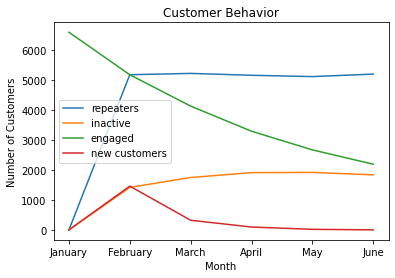

In [656]:
plt.plot(final_df.columns, df4['repeaters'], label = "repeaters")
plt.plot(final_df.columns, df4['inactive'], label = "inactive")
plt.plot(final_df.columns, df4['engaged'], label = "engaged")
plt.plot(final_df.columns, df4['new customers'], label = "new customers")

plt.xlabel('Month')
plt.ylabel('Number of Customers')
plt.title('Customer Behavior')
plt.legend()
plt.show()